In [2]:
# Loading Data
import pandas as pd
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [ ]:
train.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0,62.09
1,1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0,121.80
2,2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0,83.51
3,3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0,66.78
4,4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0,111.51


In [3]:
x_train_un_split = train.iloc[:, 1:-1]
x_train_un_split.head()

,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist
0,8.61,3.0,2.0,2.0,2.0,10.30,1.0,0.0,32.0,36509.0,0.0,0.0,0.0,0.0,0.0
1,5.00,2.0,4.0,0.0,3.0,6.66,1.0,0.0,1.0,28206.0,1.0,0.0,0.0,0.0,0.0
2,14.08,4.0,0.0,0.0,3.0,21.30,1.0,0.0,26.0,21215.0,1.0,0.0,0.0,0.0,0.0
3,4.02,3.0,5.0,0.0,0.0,14.80,0.0,1.0,36.0,21215.0,1.0,0.0,0.0,0.0,0.0
4,2.13,3.0,5.0,0.0,3.0,17.00,1.0,1.0,20.0,27694.0,1.0,1.0,1.0,1.0,1.0


In [4]:
y_train_un_split = train["cost"]

In [ ]:
y_train_un_split.head()

0     62.09
1    121.80
2     83.51
3     66.78
4    111.51
Name: cost, dtype: float64

# Handling Missing Values

In [ ]:
# Check for missing values
train.isnull().sum()

id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
cost                          0
dtype: int64

No missing values.

# Scatter Plot

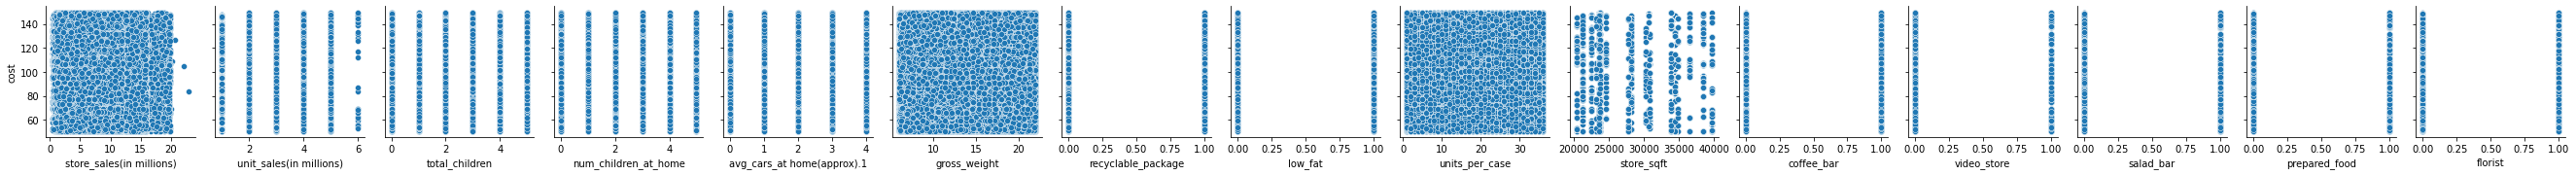

In [ ]:
import seaborn as sns

sns.pairplot(data=train, x_vars=train.columns[1:-1], y_vars='cost')

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_un_split, y_train_un_split, test_size=0.33, random_state=42)

# Modelling

## Simple KNN Model

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

def train_knn(x_train, y_train, x_test, y_test, k):
  knn_regressor = KNeighborsRegressor(n_neighbors=k)
  scores = cross_val_score(knn_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
  print("Mean Squared Error of cross validation: ", scores.mean())
  knn_regressor.fit(x_train, y_train)
  y_pred = knn_regressor.predict(x_test)
  print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))


In [ ]:
train_knn(x_train, y_train, x_valid, y_valid, 13)

Mean Squared Error of cross validation:  -899.0341088710829
Mean Squared Error:  897.1487814548736


## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

def train_linear_regression(x_train, y_train, x_test, y_test):
  lr = LinearRegression()
  scores = cross_val_score(lr, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
  print("Mean Squared Error of cross validation: ", scores.mean())
  lr.fit(x_train, y_train)
  y_pred = lr.predict(x_test)
  print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

In [ ]:
train_linear_regression(x_train, y_train, x_valid, y_valid)

Mean Squared Error of cross validation:  -879.7459473780343
Mean Squared Error:  877.451408615438


## XGBoost Model

In [6]:
from xgboost import XGBRegressor

def train_xgb(x_train, y_train, x_test, y_test):
  xgb_regressor = XGBRegressor(tree_method='gpu_hist')
  scores = cross_val_score(xgb_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
  print("Mean Squared Error of cross validation: ", scores.mean())
  xgb_regressor.fit(x_train, y_train)
  y_pred = xgb_regressor.predict(x_test)
  print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

In [7]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
train_xgb(x_train, y_train, x_valid, y_valid)

Mean Squared Error of cross validation:  -806.6147011510297
Mean Squared Error:  798.5898291308797


## CatBoost Model

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [8]:
from catboost import CatBoostRegressor

In [ ]:
def train_cat(x_train, y_train, x_test, y_test):
  cat_regressor = CatBoostRegressor(task_type='GPU')
  scores = cross_val_score(cat_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
  print("Mean Squared Error of cross validation: ", scores.mean())
  cat_regressor.fit(x_train, y_train)
  y_pred = cat_regressor.predict(x_test)
  print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))

In [ ]:
train_cat(x_train, y_train, x_valid, y_valid)

Learning rate set to 0.080494
0:	learn: 29.8287959	total: 31.7ms	remaining: 31.7s
1:	learn: 29.7397918	total: 54.4ms	remaining: 27.2s
2:	learn: 29.6557236	total: 79.2ms	remaining: 26.3s
3:	learn: 29.5790508	total: 105ms	remaining: 26s
4:	learn: 29.5170389	total: 130ms	remaining: 25.9s
5:	learn: 29.4608696	total: 159ms	remaining: 26.4s
6:	learn: 29.4153560	total: 188ms	remaining: 26.6s
7:	learn: 29.3763262	total: 216ms	remaining: 26.8s
8:	learn: 29.3405989	total: 245ms	remaining: 27s
9:	learn: 29.3087982	total: 271ms	remaining: 26.9s
10:	learn: 29.2769106	total: 294ms	remaining: 26.5s
11:	learn: 29.2538135	total: 317ms	remaining: 26.1s
12:	learn: 29.2307407	total: 341ms	remaining: 25.9s
13:	learn: 29.2114046	total: 372ms	remaining: 26.2s
14:	learn: 29.1956184	total: 398ms	remaining: 26.1s
15:	learn: 29.1751006	total: 426ms	remaining: 26.2s
16:	learn: 29.1603658	total: 453ms	remaining: 26.2s
17:	learn: 29.1417790	total: 476ms	remaining: 26s
18:	learn: 29.1252625	total: 498ms	remaining: 2

: 

Mean Squared Error of cross validation:  -806.948423545891

Mean Squared Error:  801.2314472178098

# Initial Prediction

Selected XGBoost Model as it has the lowest cross validation MSE.

In [ ]:
# Using xg boost model to predict
xgb_regressor = XGBRegressor(tree_method='gpu_hist')
xgb_regressor.fit(x_train_un_split, y_train_un_split)
y_pred = xgb_regressor.predict(test.iloc[:, 1:])

In [ ]:
# Write the predictions to a csv file with two columns: id and cost
submission = pd.DataFrame({'id':test['id'], 'cost':y_pred})
submission.to_csv('results/submission_01.csv', index=False)

# Dimensionality Reduction with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95, svd_solver = 'full')
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_train_un_split)
x_valid_pca = pca.transform(x_valid)

In [ ]:
# KNN Model
train_knn(x_train_pca, y_train, x_valid_pca, y_valid, 13)

Mean Squared Error of cross validation:  -911.7936949572565
Mean Squared Error:  910.0872677749293


In [ ]:
train_linear_regression(x_train_pca, y_train, x_valid_pca, y_valid)

Mean Squared Error of cross validation:  -894.4645251437069
Mean Squared Error:  893.7073153391896


In [ ]:
# XGBoost Model
train_xgb(x_train_pca, y_train, x_valid_pca, y_valid)

Mean Squared Error of cross validation:  -846.9606274969035
Mean Squared Error:  845.4218069925455


In [ ]:
# CatBoost Model
train_cat(x_train_pca, y_train, x_valid_pca, y_valid)

Learning rate set to 0.080494
0:	learn: 29.8383217	total: 40.9ms	remaining: 40.8s
1:	learn: 29.7506130	total: 72ms	remaining: 35.9s
2:	learn: 29.6807856	total: 105ms	remaining: 35.1s
3:	learn: 29.6215500	total: 139ms	remaining: 34.7s
4:	learn: 29.5638139	total: 171ms	remaining: 34s
5:	learn: 29.5206129	total: 204ms	remaining: 33.9s
6:	learn: 29.4759278	total: 244ms	remaining: 34.7s
7:	learn: 29.4408350	total: 278ms	remaining: 34.5s
8:	learn: 29.4114003	total: 309ms	remaining: 34s
9:	learn: 29.3814511	total: 340ms	remaining: 33.7s
10:	learn: 29.3557372	total: 372ms	remaining: 33.5s
11:	learn: 29.3360161	total: 397ms	remaining: 32.7s
12:	learn: 29.3162395	total: 422ms	remaining: 32s
13:	learn: 29.2995781	total: 446ms	remaining: 31.4s
14:	learn: 29.2868026	total: 467ms	remaining: 30.7s
15:	learn: 29.2723278	total: 488ms	remaining: 30s
16:	learn: 29.2600839	total: 512ms	remaining: 29.6s
17:	learn: 29.2469682	total: 535ms	remaining: 29.2s
18:	learn: 29.2389725	total: 556ms	remaining: 28.7s


Mean Squared Error of cross validation:  -846.677319247969

Mean Squared Error:  845.3226852187273

## Predictions with PCA

In [ ]:
pca = PCA(n_components = 0.95, svd_solver = 'full')
x_train_pca = pca.fit_transform(x_train_un_split)
x_test_pca = pca.transform(test.iloc[:, 1:])

In [ ]:
# Using cat boost model to predict
cat_regressor = CatBoostRegressor(task_type='GPU')
cat_regressor.fit(x_train_pca, y_train_un_split)
y_pred = cat_regressor.predict(x_test_pca)

Learning rate set to 0.087346
0:	learn: 29.8370796	total: 37.2ms	remaining: 37.1s
1:	learn: 29.7379374	total: 71.4ms	remaining: 35.6s
2:	learn: 29.6550944	total: 103ms	remaining: 34.3s
3:	learn: 29.5914952	total: 136ms	remaining: 33.8s
4:	learn: 29.5366690	total: 169ms	remaining: 33.6s
5:	learn: 29.4910561	total: 203ms	remaining: 33.6s
6:	learn: 29.4441859	total: 238ms	remaining: 33.8s
7:	learn: 29.4100074	total: 271ms	remaining: 33.6s
8:	learn: 29.3816882	total: 305ms	remaining: 33.6s
9:	learn: 29.3510226	total: 339ms	remaining: 33.6s
10:	learn: 29.3251070	total: 374ms	remaining: 33.6s
11:	learn: 29.3057390	total: 409ms	remaining: 33.7s
12:	learn: 29.2864204	total: 449ms	remaining: 34.1s
13:	learn: 29.2694981	total: 485ms	remaining: 34.2s
14:	learn: 29.2580923	total: 520ms	remaining: 34.1s
15:	learn: 29.2472605	total: 556ms	remaining: 34.2s
16:	learn: 29.2333794	total: 598ms	remaining: 34.6s
17:	learn: 29.2197683	total: 631ms	remaining: 34.4s
18:	learn: 29.2086866	total: 668ms	remaini

In [ ]:
submission = pd.DataFrame({'id':test['id'], 'cost':y_pred})
submission.to_csv('results/submission_02.csv', index=False)

Original model without PCA is better.

# Feature Selection

## Variance Threshold

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def variance_check(x: pd.DataFrame, variance: float) -> []:
  try:
    var_thres = VarianceThreshold(variance)
    var_thres.fit(x)

    const_columns = [column for column in x.columns
                        if column not in x.columns[var_thres.get_support()]]

    print(f"The number of constant columns is {len(const_columns)}.")
    return const_columns

  except ValueError:
    print(f"No feature exists with variance grater than {variance}.")
    return []

In [ ]:
const_columns_1 = variance_check(x_train_un_split, 0.2)

The number of constant columns is 0.


No feature dropped with variance threshold.

## Correlation

In [9]:
def correlation_check(x: pd.DataFrame, threshold: float) -> set:
  correlated_features = set()
  correlation_matrix = x.corr()
  for i in range(len(x.columns)):
      for j in range(i):
          if abs(correlation_matrix.iloc[i, j]) > threshold:
              colname = correlation_matrix.columns[i]
              correlated_features.add(colname)
  return correlated_features

In [10]:
corr = correlation_check(x_train_un_split, 0.9)
print(len(corr))

1


There is one column with correlation higher than 0.9. Drop it.

In [ ]:
corr

{'prepared_food'}

In [11]:
x_train_un_split_1 = x_train_un_split.drop(corr, axis=1)

In [12]:
x_test_1 = test.iloc[:, 1:].drop(corr, axis=1)

## Mutual Information

In [13]:
from sklearn.feature_selection import mutual_info_regression

def plot_mi_regressor(x: pd.DataFrame, y: pd.Series) -> pd.Series:
    mi = pd.Series(mutual_info_regression(x, y))
    mi = mi.sort_values(ascending=False)
    mi.plot.bar(figsize=(32, 12))
    return mi

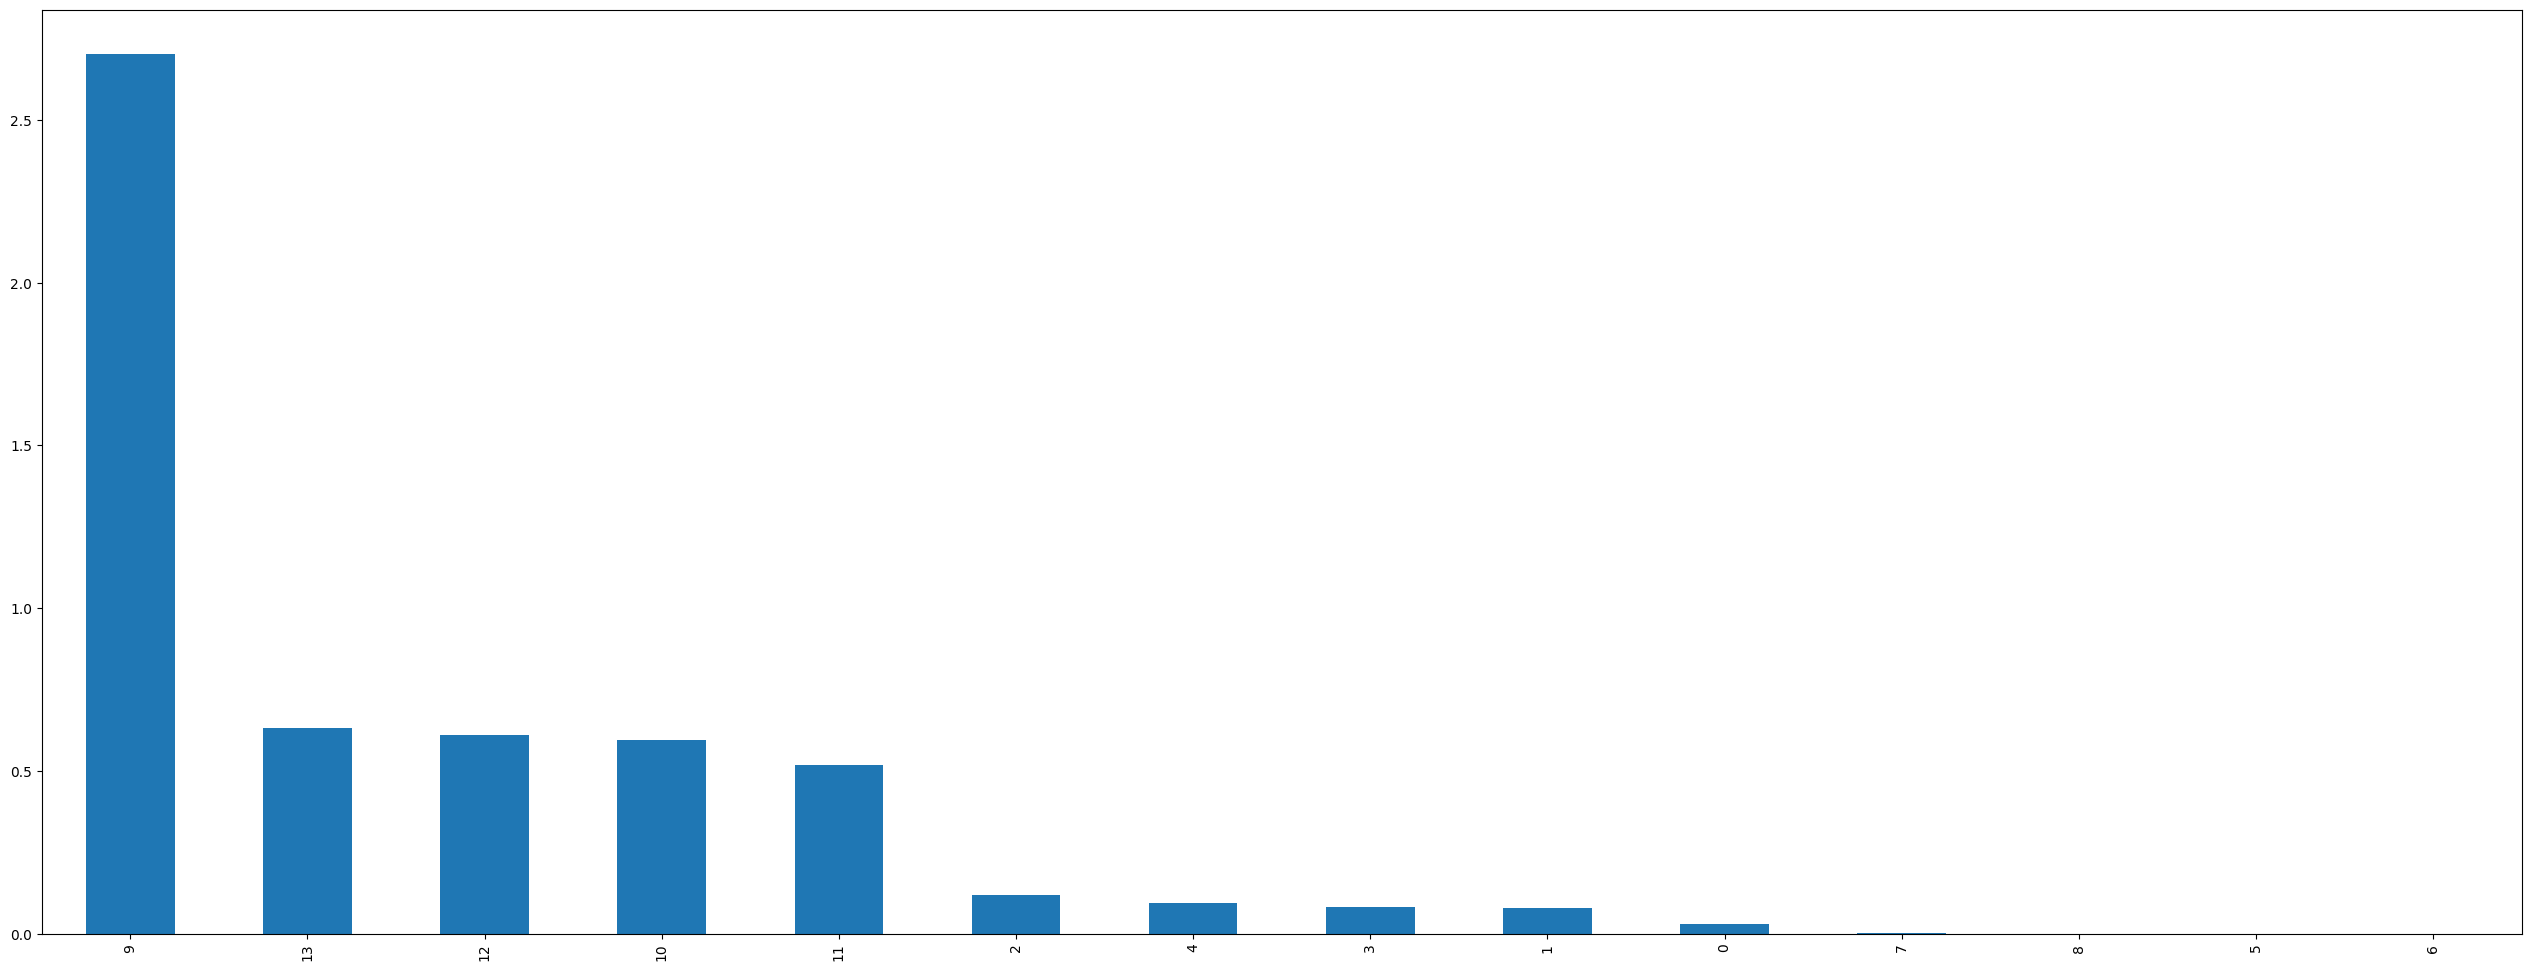

In [14]:
mi_1 = plot_mi_regressor(x_train_un_split_1, y_train_un_split)

Drop columns with mutual information lower than 0.01.

In [15]:
def feature_selection_mi(mi: pd.Series, x: pd.DataFrame, threshold: float) -> pd.DataFrame:
  selected_features = mi[mi > threshold]
  print (f"Selected {selected_features.count()} features out of {len(mi)} features.")
  selected_cols = x.columns[selected_features.index]
  print(selected_cols)
  return selected_cols

In [16]:
selected_cols_1 = feature_selection_mi(mi_1, x_train_un_split_1, 0.01)

Selected 10 features out of 14 features.
Index(['store_sqft', 'florist', 'salad_bar', 'coffee_bar', 'video_store',
       'total_children', 'avg_cars_at home(approx).1', 'num_children_at_home',
       'unit_sales(in millions)', 'store_sales(in millions)'],
      dtype='object')


In [17]:
x_train_un_split_2 = pd.DataFrame(x_train_un_split_1, columns=selected_cols_1)
x_test_2 = pd.DataFrame(x_test_1, columns=selected_cols_1)

## Modelling

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_un_split_2, y_train_un_split, test_size=0.33, random_state=42)

In [ ]:
train_knn(x_train, y_train, x_valid, y_valid, 13)

Mean Squared Error of cross validation:  -845.1225622344155
Mean Squared Error:  840.9911517729757


In [ ]:
train_linear_regression(x_train, y_train, x_valid, y_valid)

Mean Squared Error of cross validation:  -879.7124659796693
Mean Squared Error:  877.4140257693199


In [ ]:
train_xgb(x_train, y_train, x_valid, y_valid)

Mean Squared Error of cross validation:  -797.6704367837486
Mean Squared Error:  791.7589586281877


In [ ]:
train_cat(x_train, y_train, x_valid, y_valid)

Learning rate set to 0.080494
0:	learn: 29.8270351	total: 31.4ms	remaining: 31.4s
1:	learn: 29.7354683	total: 54.6ms	remaining: 27.3s
2:	learn: 29.6468993	total: 78ms	remaining: 25.9s
3:	learn: 29.5717905	total: 101ms	remaining: 25.1s
4:	learn: 29.5099683	total: 126ms	remaining: 25s
5:	learn: 29.4581954	total: 149ms	remaining: 24.7s
6:	learn: 29.4108651	total: 175ms	remaining: 24.9s
7:	learn: 29.3696787	total: 200ms	remaining: 24.8s
8:	learn: 29.3336510	total: 230ms	remaining: 25.4s
9:	learn: 29.3027178	total: 265ms	remaining: 26.2s
10:	learn: 29.2758141	total: 293ms	remaining: 26.3s
11:	learn: 29.2513257	total: 316ms	remaining: 26s
12:	learn: 29.2290459	total: 340ms	remaining: 25.8s
13:	learn: 29.2049437	total: 362ms	remaining: 25.5s
14:	learn: 29.1838534	total: 390ms	remaining: 25.6s
15:	learn: 29.1640957	total: 415ms	remaining: 25.5s
16:	learn: 29.1465089	total: 438ms	remaining: 25.3s
17:	learn: 29.1325985	total: 462ms	remaining: 25.2s
18:	learn: 29.1159743	total: 487ms	remaining: 2

Mean Squared Error of cross validation:  -797.4212092630943

Mean Squared Error:  793.0747217993628

## Predictions with Feature Selection

Using CatBoost model with feature selection gives the best result.

In [ ]:
cat_regressor = CatBoostRegressor(task_type='GPU')
cat_regressor.fit(x_train_un_split_2, y_train_un_split)
y_pred = cat_regressor.predict(x_test_2)

Learning rate set to 0.087346
0:	learn: 29.8075320	total: 45.8ms	remaining: 45.8s
1:	learn: 29.7030326	total: 81.4ms	remaining: 40.6s
2:	learn: 29.6144489	total: 118ms	remaining: 39.1s
3:	learn: 29.5404511	total: 156ms	remaining: 39s
4:	learn: 29.4726846	total: 198ms	remaining: 39.3s
5:	learn: 29.4213287	total: 233ms	remaining: 38.6s
6:	learn: 29.3755020	total: 269ms	remaining: 38.2s
7:	learn: 29.3370786	total: 303ms	remaining: 37.6s
8:	learn: 29.3029025	total: 339ms	remaining: 37.3s
9:	learn: 29.2637465	total: 375ms	remaining: 37.1s
10:	learn: 29.2375212	total: 412ms	remaining: 37s
11:	learn: 29.2137363	total: 446ms	remaining: 36.7s
12:	learn: 29.1859447	total: 477ms	remaining: 36.2s
13:	learn: 29.1660580	total: 511ms	remaining: 36s
14:	learn: 29.1486013	total: 543ms	remaining: 35.7s
15:	learn: 29.1273446	total: 574ms	remaining: 35.3s
16:	learn: 29.1117194	total: 611ms	remaining: 35.3s
17:	learn: 29.0961759	total: 645ms	remaining: 35.2s
18:	learn: 29.0840975	total: 681ms	remaining: 35

In [ ]:
submission = pd.DataFrame({'id':test['id'], 'cost':y_pred})
submission.to_csv('results/submission_03.csv', index=False)

# Hyperparameter Tuning

In [19]:
from sklearn.model_selection import RandomizedSearchCV

In [31]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'depth': [6, 8, 10, 12],
    'iterations': [500, 1000, 1500],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'bagging_temperature': [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
}

In [32]:
catboost = CatBoostRegressor(eval_metric='RMSE',
                             verbose=0,
                             task_type='GPU',
                             random_seed=42)

In [ ]:
random_search = RandomizedSearchCV(catboost, param_distributions=param_grid, n_iter=5, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
random_search.fit(x_train_un_split_2, y_train_un_split)

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7eeb1a639630>,
                   n_iter=5, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.0, 0.2, 0.4,
                                                                0.6, 0.8, 1.0],
                                        'depth': [6, 8, 10, 12],
                                        'iterations': [500, 1000, 1500],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.2]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_params = random_search.best_params_
print(best_params)

{'learning_rate': 0.1, 'l2_leaf_reg': 7, 'iterations': 1000, 'depth': 8, 'bagging_temperature': 1.0}


In [ ]:
random_search = RandomizedSearchCV(catboost, param_distributions=param_grid, n_iter=20, scoring='neg_mean_squared_error', cv=3, random_state=42, n_jobs=-1)
random_search.fit(x_train_un_split_2, y_train_un_split)

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x7eeb1a639630>,
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bagging_temperature': [0.0, 0.2, 0.4,
                                                                0.6, 0.8, 1.0],
                                        'depth': [6, 8, 10, 12],
                                        'iterations': [500, 1000, 1500],
                                        'l2_leaf_reg': [1, 3, 5, 7, 9],
                                        'learning_rate': [0.01, 0.05, 0.1,
                                                          0.2]},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_params = random_search.best_params_
print(best_params)

{'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 1500, 'depth': 12, 'bagging_temperature': 0.6}


In [ ]:
random_search = RandomizedSearchCV(catboost, param_distributions=param_grid, n_iter=50, scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1)
random_search.fit(x_train_un_split_2, y_train_un_split)

In [ ]:
best_params = random_search.best_params_

In [ ]:
best_params = {'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 1500, 'depth': 12, 'bagging_temperature': 0.6}

In [ ]:
cat_regressor = CatBoostRegressor(task_type='GPU', **best_params, verbose=0)
scores = cross_val_score(cat_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean Squared Error of cross validation: ", scores.mean())
cat_regressor.fit(x_train, y_train)
y_pred = cat_regressor.predict(x_valid)
print("Mean Squared Error: ", mean_squared_error(y_valid, y_pred))

Mean Squared Error of cross validation:  -785.6129063121332
Mean Squared Error:  780.543662354977


## Predictions with Hyperparameter Tuning

In [ ]:
cat_regressor = CatBoostRegressor(task_type='GPU', **best_params, verbose=0)
cat_regressor.fit(x_train_un_split_2, y_train_un_split)
y_pred = cat_regressor.predict(x_test_2)

In [ ]:
submission = pd.DataFrame({'id':test['id'], 'cost':y_pred})
submission.to_csv('results/submission_04.csv', index=False)

: 

# Stacking

## Hyperparameter Tuning for XGBoost

In [ ]:
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': np.arange(3, 10),
    'subsample': np.linspace(0.5, 1.0, 10),
    'colsample_bytree': np.linspace(0.5, 1.0, 10),
    'min_child_weight': np.arange(1, 10),
}

In [ ]:
xgb = XGBRegressor(tree_method='gpu_hist')

In [ ]:
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=0,
)

random_search.fit(x_train_un_split_2, y_train_un_split)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=0,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=Non...
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'subsample': array([0.5       , 0.55555556, 0.61111111, 0.66666667, 0.72222222,
       0.77777778, 0.83333333, 0.88888889, 0.94444444, 1.        ])},
                   random_state=42, scoring='neg_mean_squared_error')

In [ ]:
best_params = random_search.best_params_
print(best_params)

{'subsample': 0.7777777777777778, 'n_estimators': 900, 'min_child_weight': 6, 'max_depth': 9, 'learning_rate': 0.03, 'colsample_bytree': 0.6666666666666666}


In [ ]:
xgb_regressor = XGBRegressor(tree_method='gpu_hist')
scores = cross_val_score(xgb_regressor, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Mean Squared Error of cross validation: ", scores.mean())
xgb_regressor.fit(x_train, y_train)
y_pred = xgb_regressor.predict(x_valid)
print("Mean Squared Error: ", mean_squared_error(y_valid, y_pred))

Mean Squared Error of cross validation:  -797.6883926874564
Mean Squared Error:  791.1522876792421


## Stacking

In [22]:
from sklearn.ensemble import StackingRegressor

In [23]:
best_params_cat = {'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 1500, 'depth': 12, 'bagging_temperature': 0.6}
cat_regressor = CatBoostRegressor(task_type='GPU', **best_params_cat, verbose=0)

In [24]:
best_params_xgb = {'subsample': 0.7777777777777778, 'n_estimators': 900, 'min_child_weight': 6, 'max_depth': 9, 'learning_rate': 0.03, 'colsample_bytree': 0.6666666666666666}
xgb_regressor = XGBRegressor(tree_method='gpu_hist', **best_params_xgb)

In [25]:
base_models = [('catboost', cat_regressor), ('xgboost', xgb_regressor)]
stacked_regressor = StackingRegressor(estimators=base_models)

In [28]:
stacked_regressor.fit(x_train, y_train)
y_pred = stacked_regressor.predict(x_valid)
print("Mean Squared Error: ", mean_squared_error(y_valid, y_pred))

Mean Squared Error:  779.2509819069178


In [29]:
stacked_regressor = StackingRegressor(estimators=base_models)
stacked_regressor.fit(x_train_un_split_2, y_train_un_split)
y_pred = stacked_regressor.predict(x_test_2)

In [30]:
submission = pd.DataFrame({'id':test['id'], 'cost':y_pred})
submission.to_csv('results/submission_05.csv', index=False)